# Fast chem_evol.py

This notebook presents and tests the *pre_calculate_SSPs* implementation in chem_evol.py.  When many timesteps are required in OMEGA, the computational time becomes significant for a simple one-zone chemical evolution model. This fast version pre-calculates the simple stellar populations (SSPs) and the interpolation coefficients. This means the code does not need to fold the yields with the initial mass function (IMF) at each timestep. However, this option prevents you from modifying the IMF properties during a simulation.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import chem_evol
reload(chem_evol)
import omega
reload(omega)
import sygma
reload(sygma)

<module 'sygma' from '/Users/benoitcote/Desktop/OMEGA_SYGMA_inheritance/sygma.pyc'>

### Original Version

In [3]:
# Run original OMEGA with 1000 timestesp (this may takes a couple of minutes..)
o_ori = omega.omega(galaxy='milky_way', mgal=8e10, special_timesteps=1000)

OMEGA run in progress..
   OMEGA run completed - Run time: 506.77s


### Fast Version

In [4]:
# Let's create the timestep template for each SSP
# Here, you can decide any type of timestep option
s_dt_template = sygma.sygma(special_timesteps=1000)

# Copy the SSP timestep array
dt_in_SSPs = s_dt_template.history.timesteps

SYGMA run in progress..
   SYGMA run completed - Run time: 8.94s


By using the *dt_in_SSPs* array, the OMEGA timesteps can be different from the SSP timesteps. If *dt_in_SSPs* is not provided when running OMEGA, each SSP will have the same timsteps as OMEGA.

In [5]:
# Let's pre-calculate the SSPs.
# Here I choose a very low number of OMEGA timesteps.
# I do this because I only want to use this instance 
# to copy the SSPs, so I won't have to recalculate
# them each time I want to run an OMEGA simulation.
o_for_SSPs = omega.omega(special_timesteps=2, pre_calculate_SSPs=True, dt_in_SSPs=dt_in_SSPs)

OMEGA run in progress..
SYGMA run in progress..
   SYGMA run completed - Run time: 8.81s
SYGMA run in progress..
   SYGMA run completed - Run time: 9.76s
SYGMA run in progress..
   SYGMA run completed - Run time: 9.54s
SYGMA run in progress..
   SYGMA run completed - Run time: 9.88s
SYGMA run in progress..
   SYGMA run completed - Run time: 9.91s
SYGMA run in progress..
   SYGMA run completed - Run time: 9.9s
Warning -- Not enough gas to sustain the SFH. 2
   OMEGA run completed - Run time: 65.38s


In [6]:
# Let's copy the SSPs array
SSPs_in = [o_for_SSPs.ej_SSP, o_for_SSPs.dt_ssp, o_for_SSPs.t_ssp]
# SSPs_in[0] --> Mass (in log) ejected for each isotope. It's an array in the form of [nb Z][nb SSP dt][isotope]
# SSPs_in[1] --> List of timesteps
# SSPs_in[2] --> List of galactic ages

In [7]:
# Finally, let's run the fast version (1000 timesteps)
o_fast = omega.omega(galaxy='milky_way', mgal=8e10, special_timesteps=1000, \
                     pre_calculate_SSPs=True, SSPs_in=SSPs_in)

OMEGA run in progress..
   OMEGA run completed - Run time: 18.22s


### Comparison

Warning. The results with the fast version are very close to the original version, but sometime they may not be exactly the same.

<IPython.core.display.Javascript object>


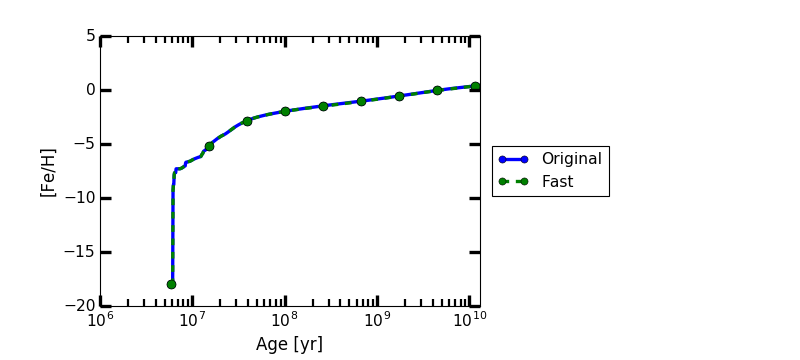

In [8]:
%matplotlib nbagg
o_ori.plot_spectro(color='b',  label='Original')
o_fast.plot_spectro(color='g', shape='--', label='Fast')
plt.xscale('log')

<IPython.core.display.Javascript object>


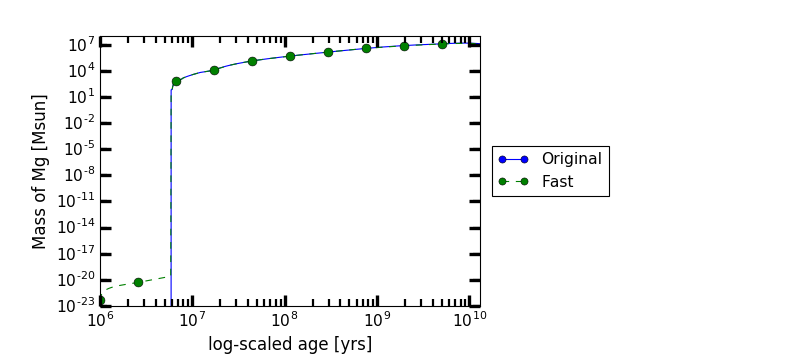

In [9]:
%matplotlib nbagg
o_ori.plot_mass( specie='Mg', color='b', markevery=100000, label='Original')
o_fast.plot_mass(specie='Mg', color='g',  markevery=100,   shape='--', label='Fast')
plt.ylabel('Mass of Mg [Msun]')

<IPython.core.display.Javascript object>


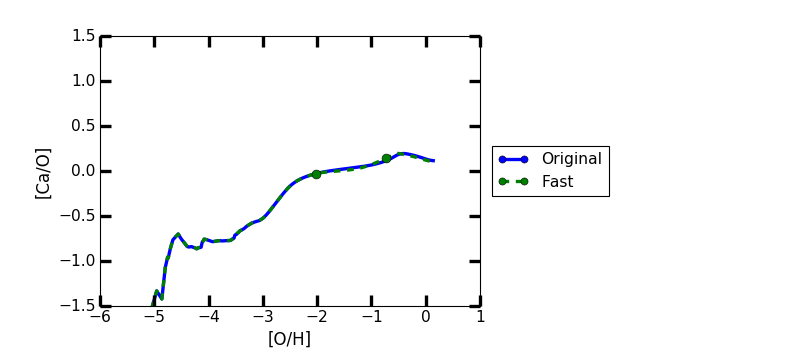

(-1.5, 1.5)

In [11]:
%matplotlib nbagg
o_ori.plot_spectro( xaxis='[O/H]', yaxis='[Ca/O]', color='b', markevery=100000, label='Original')
o_fast.plot_spectro(xaxis='[O/H]', yaxis='[Ca/O]', color='g', shape='--', markevery=300, label='Fast')
plt.ylim(-1.5,1.5)